## Twitter Sentiment Analysis for six major US Airlines


## Install and upgrade necessary libraries and modules in root directory

In [108]:
# !pip install -U contractions
# !pip install -U unidecode
#!pip install -U pip setuptools wheel spacy[lookups,transformers] 
#!pip install pyversions

## Set up display options in Jupyter Notebook

In [196]:
# set up display area to show dataframe in jupyter qtconsole
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option("display.precision", 2)

# display all text in a pandas cell without truncation
pd.set_option('display.max_colwidth', None) 

# suppress/disable all warnings in the current script/notebook. No warnings will be printed from now on
import warnings
warnings.filterwarnings('ignore')

# enable inline plotting so the plots/graphs are displayed just below the cell where your plotting commands are written
%matplotlib inline  

# display html in jupyter notebook
from IPython.display import display, HTML

SEED=42

## Import necessary libraries and modules

In [103]:
# install and import necessary libraries.

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# nltk.download('stopwords')                            # Download Stopwords.
# nltk.download('punkt')
# nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import matplotlib.pyplot as plt                         
import seaborn as sns

# Versions of imported libraries and versions in current session

In [110]:
import datetime
now = datetime.datetime.now()
print("Creation date and time: '2022-09-10 12:04:53.135512'")
print()
print("Versions of libraries and modules")
print("------------------------------------")
import pyversions
from pyversions import versions
vs = pyversions.versions()                                  
versions();  # semicolon to avoid printing information twice

Creation date and time: '2022-09-10 12:04:53.135512'

Versions of libraries and modules
------------------------------------
Windows 10 64-bit 10.0.22000
CPython 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Sep 10 2022, 12:28:19

Module             Version
contractions        0.1.68
ipython              8.4.0
jupyterlab           3.3.2
matplotlib           3.5.1
nltk                   3.7
notebook            6.4.11
numpy               1.21.5
pandas               1.4.3
PIL                  9.2.0
plotly               5.5.0
pyversions           0.0.3
re                   2.2.1
seaborn             0.11.2
setuptools          65.3.0
wheel               0.37.1
Windows 10 64-bit 10.0.22000
CPython 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Sep 10 2022, 12:28:19

Module             Version
contractions        0.1.68
ipython              8.4.0
jupyterlab           3.3.2
matplotlib           3.5.1
nltk                   3.7
notebook            6.4.11


## Load CSV dataset to Pandas DataFrame

In [161]:
# Read a comma-separated values (csv) file into Python Pandas DataFrame and assign it to a variable
data=pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.7,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Print the shape of the data

In [114]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))
print("There are {} types of sentiments in this dataset such as {}... \n".format(len(data['airline_sentiment'].unique()), ", ".join(data['airline_sentiment'].unique()[0:5])))
print("There are {} airlines that air passengers mentioned in this dataset such as {}... \n".format(len(data['airline'].unique()), ", ".join(data['airline'].unique()[0:5])))

There are 14640 observations and 15 features in this dataset. 

There are 3 types of sentiments in this dataset such as neutral, positive, negative... 

There are 6 airlines that air passengers mentioned in this dataset such as Virgin America, United, Southwest, Delta, US Airways... 



## Data description

In [115]:
# Check for NUL values
data.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [116]:
# Print a concise summary of the DataFrame 'tweet'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [129]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [117]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

### Checking if data is duplicated and removing duplicates

In [118]:
# Check for duplicate rows
duplicateRowsDF = data[data.duplicated()]
print(duplicateRowsDF.head())

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   

               negativereason  negativereason_confidence   airline  \
12040  Customer Service Issue                        1.0  American   
12059                     NaN                        NaN  American   
12063                     NaN                        NaN  American   
12066                     NaN                        NaN  American   
12068             Late Flight                        1.0  American   

      airline_sentiment_gold            name negativereason_gold  \
12040                    NaN      SweeLoTmac    

In [119]:
print(duplicateRowsDF.shape)  

(36, 15)


- There are 36 duplicate rows

In [120]:
# Drop the duplicate rows
data.drop_duplicates(keep=False,inplace=True) 

In [121]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.46e+04,14568.00,10484.00,14568.00
mean,5.69e+17,0.90,0.64,0.08
std,7.77e+14,0.16,0.33,0.75
min,5.68e+17,0.34,0.00,0.00
25%,5.69e+17,0.69,0.36,0.00
50%,5.69e+17,1.00,0.67,0.00
75%,5.70e+17,1.00,1.00,0.00
max,5.70e+17,1.00,1.00,44.00


In [122]:
# Groupby by airline
airlines = data.groupby("airline")

# Summary statistic of all airlines
airlines.describe().head()

tweet_id                                                    \
              count      mean       std       min       25%       50%   
airline                                                                 
American     2687.0  5.70e+17  2.31e+14  5.68e+17  5.70e+17  5.70e+17   
Delta        2222.0  5.69e+17  7.76e+14  5.68e+17  5.68e+17  5.69e+17   
Southwest    2420.0  5.69e+17  7.97e+14  5.68e+17  5.68e+17  5.69e+17   
US Airways   2913.0  5.69e+17  7.68e+14  5.68e+17  5.68e+17  5.69e+17   
United       3822.0  5.69e+17  7.52e+14  5.68e+17  5.68e+17  5.69e+17   

                               airline_sentiment_confidence                    \
                 75%       max                        count  mean   std   min   
airline                                                                         
American    5.70e+17  5.70e+17                       2687.0  0.92  0.15  0.34   
Delta       5.70e+17  5.70e+17                       2222.0  0.87  0.18  0.34   
Southwest   5.70e+17  5.70e+17                       2420.0  0.89  0.17  0.34   
US Airways  5.70e+17  5.70e+17                       2913.0  0.92  0.15  0.34   
United      5.70e+17  5.70e+17                       3822.0  0.90  0.16  0.34   

                                negativereason_confidence                   \
             25%  50%  75%  max                     count  mean   std  min   
airline                                                                      
American    1.00  1.0  1.0  1.0                    2152.0  0.66  0.32  0.0   
Delta       0.67  1.0  1.0  1.0                    1184.0  0.57  0.35  0.0   
Southwest   0.68  1.0  1.0  1.0                    1445.0  0.60  0.35  0.0   
US Airways  1.00  1.0  1.0  1.0                    2470.0  0.69  0.31  0.0   
United      0.69  1.0  1.0  1.0                    3000.0  0.63  0.32  0.0   

                                 retweet_count                             \
             25%   50%  75%  max         count  mean   std  min  25%  50%   
airline                                                                     
American    0.37  0.67  1.0  1.0        2687.0  0.04  0.31  0.0  0.0  0.0   
Delta       0.34  0.66  1.0  1.0        2222.0  0.11  1.07  0.0  0.0  0.0   
Southwest   0.35  0.67  1.0  1.0        2420.0  0.06  0.55  0.0  0.0  0.0   
US Airways  0.62  0.68  1.0  1.0        2913.0  0.09  1.17  0.0  0.0  0.0   
United      0.36  0.67  1.0  1.0        3822.0  0.11  0.37  0.0  0.0  0.0   

                       
            75%   max  
airline                
American    0.0   5.0  
Delta       0.0  31.0  
Southwest   0.0  22.0  
US Airways  0.0  44.0  
United      0.0   7.0

In [124]:
# top five airlines among the six airlines
airlines.mean().sort_values(by="tweet_id",ascending=False).head()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
airline,,,,
American,5.70e+17,0.92,0.66,0.04
US Airways,5.69e+17,0.92,0.69,0.09
United,5.69e+17,0.90,0.63,0.11
Delta,5.69e+17,0.87,0.57,0.11
Virgin America,5.69e+17,0.88,0.56,0.05


## **2. Exploratory data analysis**
Do Exploratory data analysis(EDA) based on the below statement. 
- a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
- b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
- c. Plot the word cloud graph of tweets for positive and negative sentiment separately. Mention the observations & insights after plotting each graph.

### Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.

In [125]:
# number of airline classes
data['airline'].nunique()

6

In [126]:
# airline classes using Pandas unique method
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [127]:
# airline class distribution using Pandas value_counts() method
data['airline'].value_counts(sort=False)

Virgin America     504
United            3822
Southwest         2420
Delta             2222
US Airways        2913
American          2687
Name: airline, dtype: int64

In [128]:
# returns an array of index names from a Pandas Series only
data['airline'].value_counts(sort=False).index

Index(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'],
      dtype='object')

In [129]:
# returns an array of values from a Pandas Series only
data['airline'].value_counts(sort=False).values

array([ 504, 3822, 2420, 2222, 2913, 2687], dtype=int64)

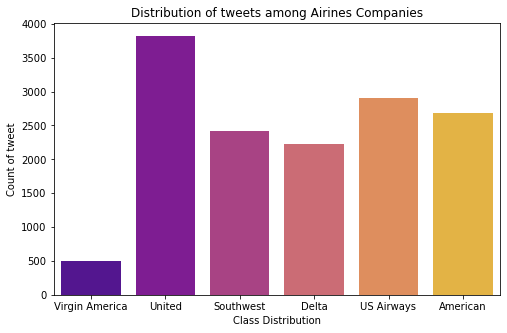

In [130]:
# Plot the distribution of sentiment across all the tweets
plt.figure(figsize=(8,5))
colors='plasma'
sns.barplot(x=data['airline'].value_counts(sort=False).index, y=data['airline'].value_counts(sort=False).values, palette=colors)
plt.title('Distribution of tweets among Airines Companies')
plt.xlabel("Class Distribution")
plt.ylabel("Count of tweet")
plt.show()

### Plot the distribution of sentiment across all the tweets

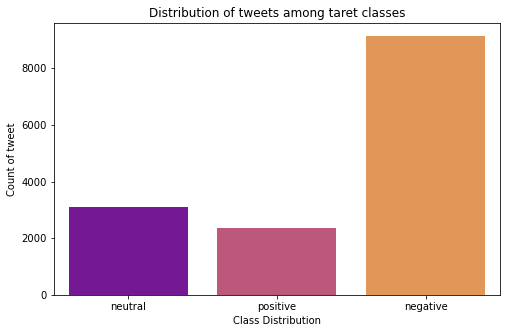

In [131]:
# Plot the distribution of sentiment across all the tweets
plt.figure(figsize=(8,5))
colors='plasma'
sns.barplot(x=data['airline_sentiment'].value_counts(sort=False).index, y=data['airline_sentiment'].value_counts(sort=False).values, palette=colors)
plt.title('Distribution of tweets among taret classes')
plt.xlabel("Class Distribution")
plt.ylabel("Count of tweet")
plt.show()

Observations:
- Majorities are negative, and it would be great/free feedback to airlines to provide appropriate responses. 
- We can also show sentiments for each airline.
- It also shows that the class distribution is imbalanced and our model may not generalize well with unseen data. Therefore, we could use one of the optimization techniques to balance the target classes. 

### Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

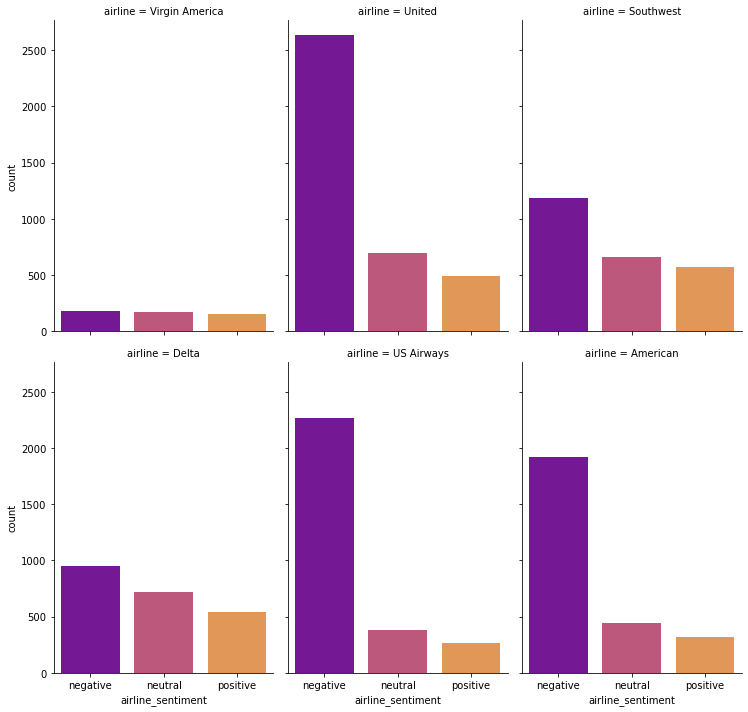

In [132]:
# Plot the distribution of Sentiment of tweets for each airline
g = sns.FacetGrid(data, col='airline', col_wrap=3, height=5, aspect =0.7) # Multi-plot grid for plotting conditional relationships.
g = g.map(sns.countplot, 'airline_sentiment', order =data.airline_sentiment.value_counts().index, palette= 'plasma') 
plt.show()

- Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
- Virgin America has the least number of negative reviews

Customer Service Issue         2898
Late Flight                    1655
Can't Tell                     1190
Cancelled Flight                839
Lost Luggage                    718
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     479
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


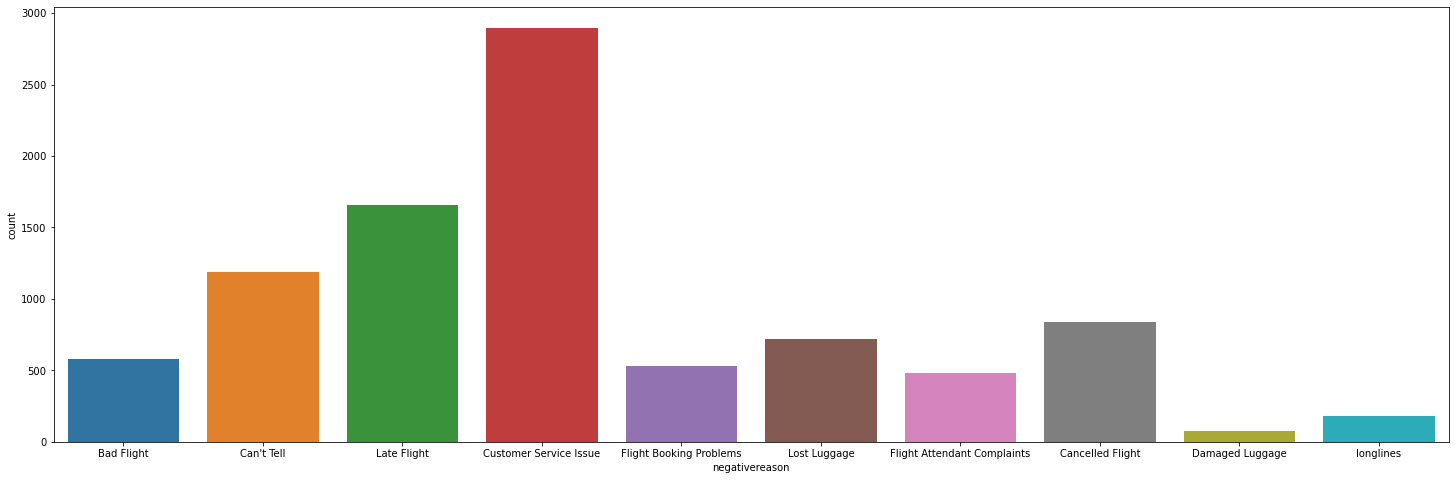

In [133]:
# Plot the distribution of all the negative reasons
y = data['negativereason']
print(y.value_counts())
plt.figure(figsize=(25,8)) 
g = sns.countplot(y)

- Customer service and Late flight seems to be the main reason why customers are giving bad feedback

### Word cloud graph of tweets for negative sentiment

In [146]:
from wordcloud import WordCloud,STOPWORDS
airline_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

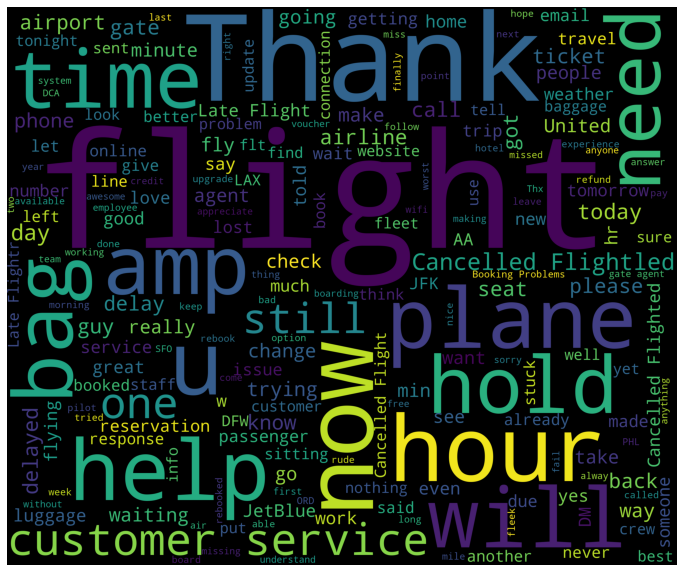

In [147]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- Tweets with negative sentiment are frequently include words like cancelled, customer, hour and flight. People might guess that customer tends to complain when they are waiting for delayed flights. 

### Word cloud graph of tweets for positive sentiment

In [148]:
airline_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

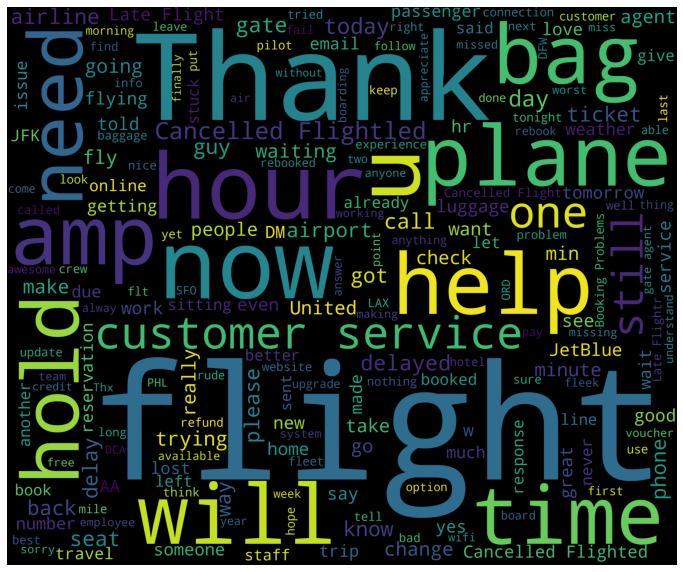

In [149]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Observations & Insights on EDA**
- There are 14640 rows and 15 columns in the tweet data
- There are 36 duplicate records in the data set
- Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
- Virgin America has the least number of negative reviews
- Customer service and Late flight seems to be the main reason why customers are giving bad feedback

## **3. Understanding of Data Columns**
Understand of data columns:  
- a. Drop all other columns except “text” and “airline_sentiment”. 
- b. Check the shape of the data. 
- c. Print the first 5 rows of data.

### Drop all other columns except “text” and “airline_sentiment”

In [162]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [163]:
# Let us now remove irrelevant columns
df = data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

In [164]:
# Shape of Data
df.shape

(14640, 2)

In [165]:
# Printing first 5 rows of data
df.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


- There are 14568 rows and 2 columns (This is result of keeping relevant rows and duplicate data cleanup)

In [166]:
# Class distribution in the target variable
print(df.airline_sentiment.value_counts())

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


- We observe that the class distribution in the target variable is highly inblanced such that our model cannot generalize well in with unseen data. We will use one of the resampling techniques to balance the class distribution in the target variable. Also, we will remove the neutral sentiment, given that the negative and positive sentinents matter more. 

In [167]:
#removing the neutral sentiments considering that positive and negative sentiments matter more 
df=df[df['airline_sentiment']!='neutral']
#now since neutral elements are deleted so I need to reset the indices
df.reset_index(inplace=True,drop=True)
#positive sentiments to 1 and negative to 0 
def partition(x):
    if x =='positive':
        return 1
    return 0
actualSentiment = df['airline_sentiment']
positiveNegative = actualSentiment.map(partition) 
df['Sentiment'] = positiveNegative
df['Sentiment'].value_counts() 

0    9178
1    2363
Name: Sentiment, dtype: int64

In [168]:
df.head()

,airline_sentiment,text,Sentiment
0,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,1
1,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
2,negative,@VirginAmerica and it's a really big bad thing about it,0
3,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,0
4,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1


## **4. Text pre-processing: Data preparation.**
 

**NOTE:-** Each text pre-processing step should be mentioned in the notebook separately. We perform preprocessing tasks in two groups and in order. First, we apply the functions to remove html tags, followed by replacing contractions, then remove accented characters and finally remove number. This is performed on the DataFrame before tokenization and the remaining text preprocessing activities, which constitute the second group. 

- a. Html tag removal. 
- b. Tokenization. 
- c. Remove the numbers. 
- d. Removal of Special Characters and Punctuations. 
- e. Removal of stopwords 
- f. Conversion to lowercase. 
- g. Lemmatize or stemming. 
- h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) 
- i. Print the first 5 rows of data after pre-processing.

**Group 1:** Perform the operations irrespective of whether the issues are there because it is challenging to observe the aspects in larage data. 

**Html tag removal**

In [169]:
#Function to Remove HTML Tags in original text
def strip_html(text):
    
    """1. Replace html tags in the Text"""
    
    NewText = BeautifulSoup(text, "html.parser").get_text()
    
    return NewText

**Replace Contraction**

In [170]:
#Function to Replace Contractions with complete words in original text
def replace_contractions(text):
    
    """Replace contractions in string of text. e.g. don't -> do not"""
    NewText = contractions.fix(text)
    return NewText

**Remove accented characters from text**

In [171]:
#Function to remove Accented Characters using unidecode
#!pip install unidecode
#import unicodedata 

import unidecode

def remove_accented_chars(text):
    
    """Remove accented characters from text, e.g. café"""
    
    NewText = unidecode.unidecode(text)
    
    return NewText


**Removal of Numbers**

In [172]:
#Function to Remove Numbers from the Abstract

def remove_numbers(text):
    """Removing Numbers using Regular Expression"""
    text = re.sub(r'\d+', '', text)
    
    return text

In [173]:
# Apply the finctions on the DataFrame

df['text'] = df['text'].apply(lambda x: strip_html(x))
df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df['text'] = df['text'].apply(lambda x: remove_accented_chars(x))
df['text'] = df['text'].apply(lambda x: remove_numbers(x))

In [174]:
# Print first five rows
df.head()

,airline_sentiment,text,Sentiment
0,positive,@VirginAmerica plus you have added commercials to the experience... tacky.,1
1,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",0
2,negative,@VirginAmerica and it is a really big bad thing about it,0
3,negative,@VirginAmerica seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA,0
4,positive,"@VirginAmerica yes, nearly every time I fly VX this ""ear worm"" will not go away :)",1


**Group 2:** First perform tokenization because the rest of the preprocessing activities are performed on tokens.

**Tokenization**

In [176]:
# Tokenization of data
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 
# Print the first five rows of the tokenized DataFrame
df.head()

,airline_sentiment,text,Sentiment
0,positive,"[@, VirginAmerica, plus, you, have, added, com...",1
1,negative,"[@, VirginAmerica, it, is, really, aggressive,...",0
2,negative,"[@, VirginAmerica, and, it, is, a, really, big...",0
3,negative,"[@, VirginAmerica, seriously, would, pay, $, a...",0
4,positive,"[@, VirginAmerica, yes, ,, nearly, every, time...",1


**Remove special characters and punctuations**

In [175]:
# Function to remove Special Characters and Punctuations
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

**Removal of stopwords**

In [176]:
# download a file with English stopwords
import nltk
nltk.download('stopwords')

# verifying the stopwords have been downloaded and imported successfully
from nltk.corpus import stopwords
#stopwords.words('english')
#stopwords.words()[::3]

[nltk_data] Downloading package stopwords to C:\Users\hubert
[nltk_data]     foy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
# create an english stopword object
stopwords = stopwords.words('english')

#Function to remove Stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []   
    for word in words:  
        if word not in stopwords:
            #Append Tokens not falling under stopwords
            new_words.append(word)
    return new_words

**Conversion to Lower case**

In [178]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting token to lowercase
        new_words.append(new_word)        # Append processed procesed token back to new list.
    return new_words

**Stemming**

In [179]:
def stem_words(words):

    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
     
    stems = []             # Create empty list to store tokens post stemming words              
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return ' '.join(stems)    #Join the words in the list to convert back to text string in the dataframe



**Lemmatization**

In [180]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()      #Creating Object for Word Net Lemmatizer
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

**Remove non ASCII words**

In [181]:
#Function to remove non ASCII words
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        #Encode & Decode Tokens to UTF-8
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        #Append Tokens Back
        new_words.append(new_word)
    return new_words

**Remove empty String**

In [182]:
def remove_empty_string(words):
  return list(filter(None, words))

**Complete Pre-preocessing**

In [183]:
#Function to call all functions and finally join the tokens back
def clean_data(words):
    #Function Call
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_special_character_punctuation(words)
    words = remove_stopwords(words)
    #words = stem_words(words)
    words = lemmatize_verbs(words)
    words =  remove_empty_string(words)
    return words

In [184]:
df['text'] = df['text'].apply(lambda x: clean_data(x))

**Join the words in the list to convert back to text string in the dataframe**

In [188]:
# convert string to list of tokens
import nltk
nltk.download('averaged_perceptron_tagger')

for i, row in df.iterrows():
    
    sentence=str(df.at[i,'text'])
    
    tagged_sentence = nltk.tag.pos_tag(sentence.split())
    
    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    
    df.at[i,'text']=(' '.join(edited_sentence))
    
#df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hubert foy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Print the first five rows of the DataFrame after preprocessing**

**Handling Missing Values**

In [189]:
df.isna().sum()

airline_sentiment    0
text                 0
Sentiment            0
dtype: int64

## **6. Modelling , tuning and Evaluation**
- Fit the model using vectorized column 
- Tune the model to improve the accuracy 
- Evaluate the model using the confusion matrix 
- Target the final score >= 75% 
- Print the top 40 features and plot their word cloud using both types of vectorization. 

## **Modeling Building using Classifier implementing the k-nearest neighbors vote.**

## **5. Vectorization**
Convert text data to numbers.

- a. Use CountVectorizer. 
- b. Use TfidfVectorizer. 
- Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model

### **KNN on CountVectorizer**

In [191]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [193]:
data_features.shape

(14640, 5000)

In [195]:
X = data_features
y = data.airline_sentiment

In [197]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


In [235]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7138661202185792


### Optimize the parameter:The number of trees in the random forest model(n_estimators)

In [237]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [239]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

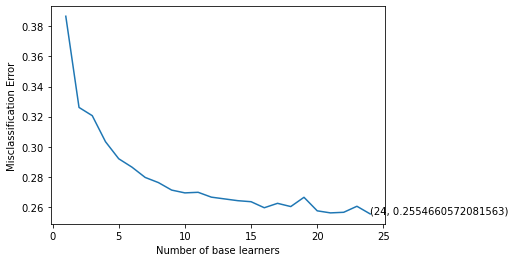

In [240]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [241]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7661657559198543

In [242]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

[[2660  111   43]
 [ 481  354   49]
 [ 272  106  316]]


<AxesSubplot:>

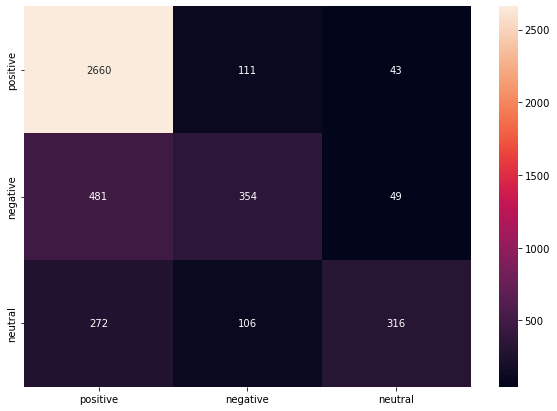

In [243]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## **Wordcloud of top 20 important features from countvectorizer+Randomforest based model**

thanks,thank,jetblue,great,to,you,not,no,and,the,flight,co,southwestair,usairways,on,my,united,is,your,for,virginamerica,can,hours,it,in,americanair,delayed,that,http,do,me,amazing,why,awesome,but,of,cancelled,was,love,service,
 
 


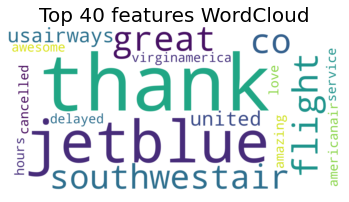

In [248]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Term Frequency (TF) - Inverse Document Frequency (IDF)

In [252]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=5000)
data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 5000)

In [253]:
X = data_features
y = data.airline_sentiment

In [254]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7095628415300547


In [255]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [256]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

thanks, thank, great, no, to, jetblue, you, not, and, usairways, the, on, is, flight, united, my, for, southwestair, http, your, hold, it, co, americanair, that, in, can, virginamerica, love, do, me, but, of, been, have, was, service, delayed, hours, dm, 
 
 


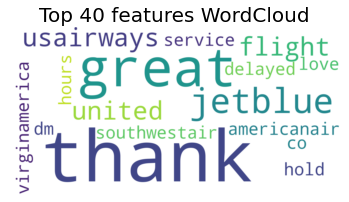

In [259]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [257]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7693533697632058

In [263]:
result = forest.predict(X_test)

<AxesSubplot:>

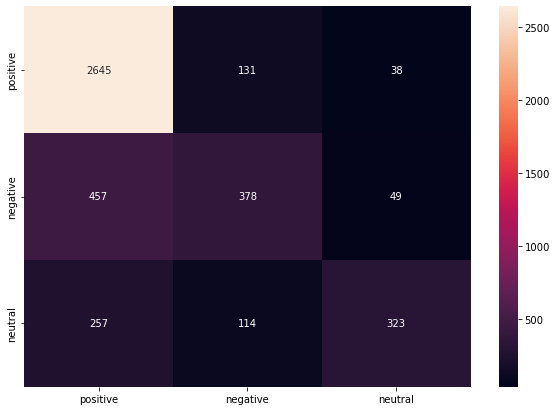

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

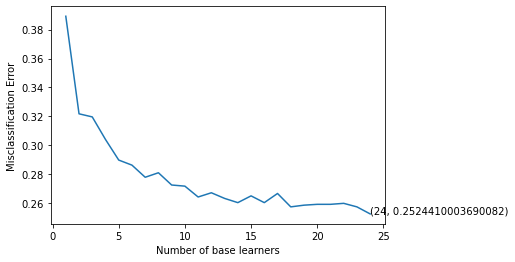

In [261]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

## **7. Summary**

- We used dataset which has tweets in text format and their sentiment type (positive, negative and neutral).

- The goal was to build a model for text-classification.

- We created a custom function to plot labeled barplots.

- We plotted the percentage of public tweets for each airlines.

- We plotted the distribution of sentiment across all the tweets.

- We plotted the distribution of tweets for each airline

- We plotted the distribution of all the negative reason & found that customer service issue & late fight were the major negative sentiment reason

- We plotted the word cloud of positive and negative sentiment tweets.

- We Pre-processed the data using variuos techniques and libraries.

- The pre-precessed data is converted(vectorized) to numbers, so that we can feed the data in the model.

- After building the classification model, we predicted the result for the test data.

- We trained the model and optimize the parameter that led to significant increase in the overall accuracy

- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.

- We can increase the max_feature parameter in the vectorizer &we can also apply other model and hyperparameter tuning to increase the overall accuracy.

- One more way to increase accuracy is to use different variations of Pre-processing techniques.